In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)  # Set default figure size

In [78]:
df = pd.read_csv('data.csv')

In [79]:
df.head()  # Display the first few rows of the DataFrame                

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00,1.00,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00,3.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00,3.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00,1.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00,1.00,51.00


In [80]:
df.describe()  # Get a statistical summary of the DataFrame

,bath,balcony,price
count,13247.00,12711.00,13320.00
mean,2.69,1.58,112.57
std,1.34,0.82,148.97
min,1.00,0.00,8.00
25%,2.00,1.00,50.00
50%,2.00,2.00,72.00
75%,3.00,2.00,120.00
max,40.00,3.00,3600.00


In [81]:
df.isna().sum()  # Check for missing values in the DataFrame

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [82]:
df.describe(include='all')  # Get a statistical summary of all columns, including non-numeric ones

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.00,12711.00,13320.00
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.69,1.58,112.57
std,NaN,NaN,NaN,NaN,NaN,NaN,1.34,0.82,148.97
min,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,8.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.00,1.00,50.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,72.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.00,2.00,120.00


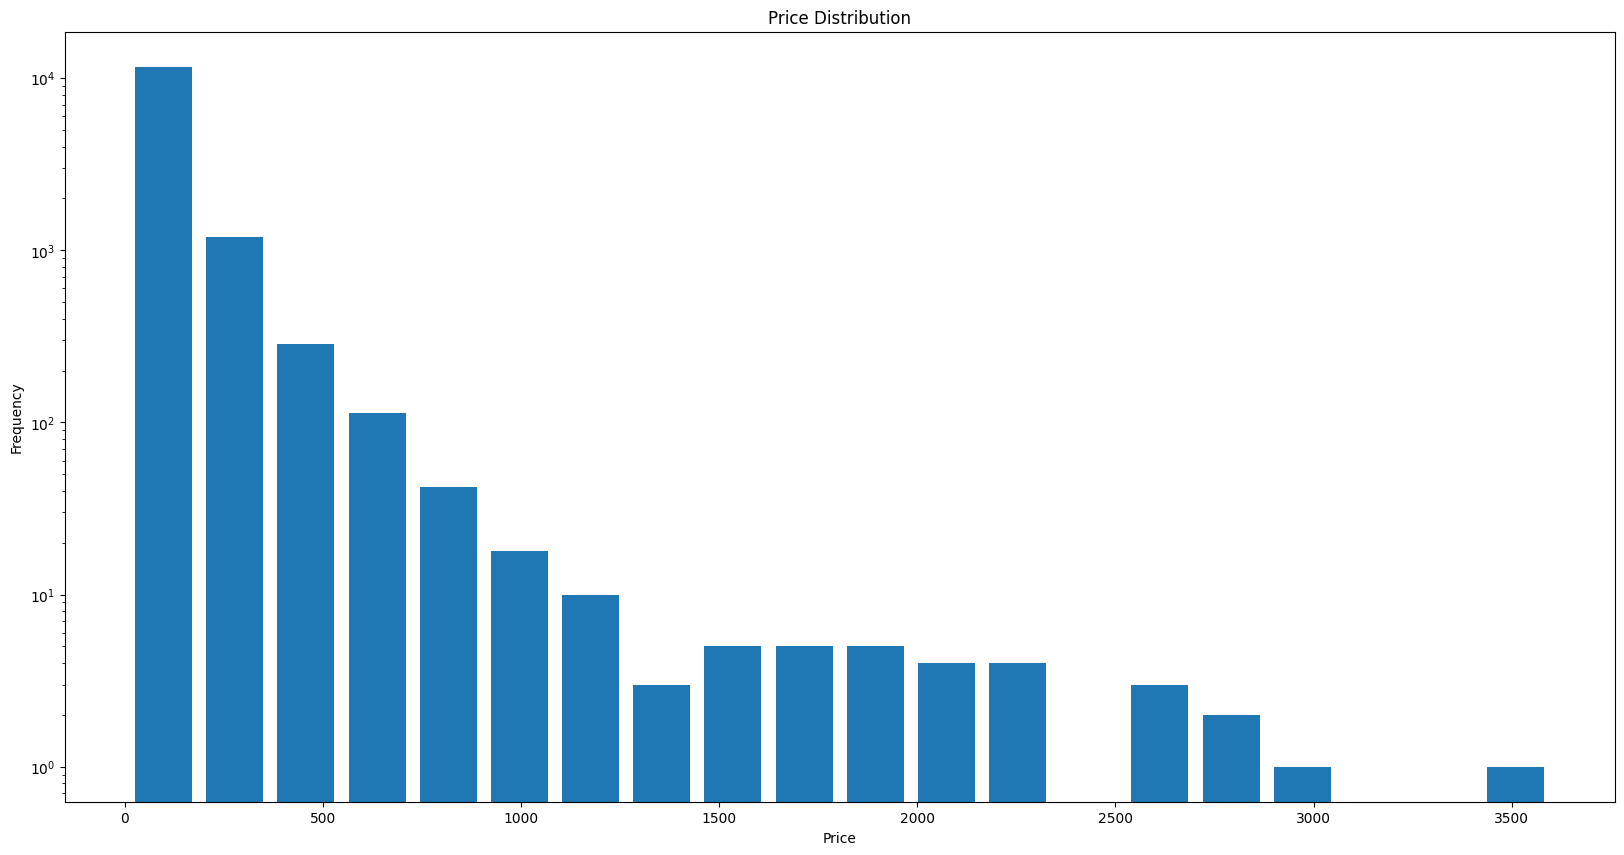

In [83]:
plt.hist(df['price'], bins=20, rwidth=0.8 )  # Replace 'column_name' with the actual column you want to plot
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.yscale('log')  # Use logarithmic scale for better visibility
plt.show()

In [84]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00,1.00,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00,3.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00,3.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00,1.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00,1.00,51.00


In [85]:
df.groupby('area_type')["area_type"].count().sort_values(ascending=False)  # Count of area types

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [86]:
df2 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')  # Drop unnecessary columns


In [87]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.00,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.00,120.00
2,Uttarahalli,3 BHK,1440,2.00,62.00
3,Lingadheeranahalli,3 BHK,1521,3.00,95.00
4,Kothanur,2 BHK,1200,2.00,51.00


In [88]:
df2.isnull().sum()  # Check for missing values in the cleaned DataFrame

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [89]:
df2.shape

(13320, 5)

In [90]:
df3 = df2.dropna()  # Drop rows with missing values
df3.shape  # Check the shape of the DataFrame after dropping missing values

(13246, 5)

In [91]:
df3.isnull().sum()  # Verify that there are no missing values left

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [92]:
df3.describe(include='all')  # Get a statistical summary of the cleaned DataFrame

,location,size,total_sqft,bath,price
count,13246,13246,13246,13246.00,13246.00
unique,1304,31,2067,NaN,NaN
top,Whitefield,2 BHK,1200,NaN,NaN
freq,534,5198,843,NaN,NaN
mean,NaN,NaN,NaN,2.69,112.39
std,NaN,NaN,NaN,1.34,149.08
min,NaN,NaN,NaN,1.00,8.00
25%,NaN,NaN,NaN,2.00,50.00
50%,NaN,NaN,NaN,2.00,72.00
75%,NaN,NaN,NaN,3.00,120.00


In [93]:
df3['size'].unique()  # Check unique values in the 'size' column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [94]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))  # Extract the number of bedrooms

/tmp/ipykernel_6654/3989675958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))  # Extract the number of bedrooms


In [95]:
df3.describe()

,bath,price,bhk
count,13246.00,13246.00,13246.00
mean,2.69,112.39,2.80
std,1.34,149.08,1.30
min,1.00,8.00,1.00
25%,2.00,50.00,2.00
50%,2.00,72.00,3.00
75%,3.00,120.00,3.00
max,40.00,3600.00,43.00


In [96]:
df3.sample(5)

,location,size,total_sqft,bath,price,bhk
7573,Hoodi,4 Bedroom,1100,4.00,120.00,4
3062,Rajaji Nagar,3 BHK,1800,3.00,260.00,3
3426,AGS Layout,3 BHK,1490,2.00,59.60,3
4271,Whitefield,3 Bedroom,1200,3.00,61.96,3
12465,Palace Guttahalli,3 Bedroom,875,3.00,115.00,3


In [97]:
df3.bhk.unique()  # Check unique values in the 'bhk' column

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [98]:
df3[df3.bhk > 20]  # Check for any outliers in the 'bhk' column

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.00,230.00,27
4684,Munnekollal,43 Bedroom,2400,40.00,660.00,43


/tmp/ipykernel_6654/1739577230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df3.bhk, df3.price, 'ro', color='blue')  # Plotting the relationship between 'bhk' and 'price'


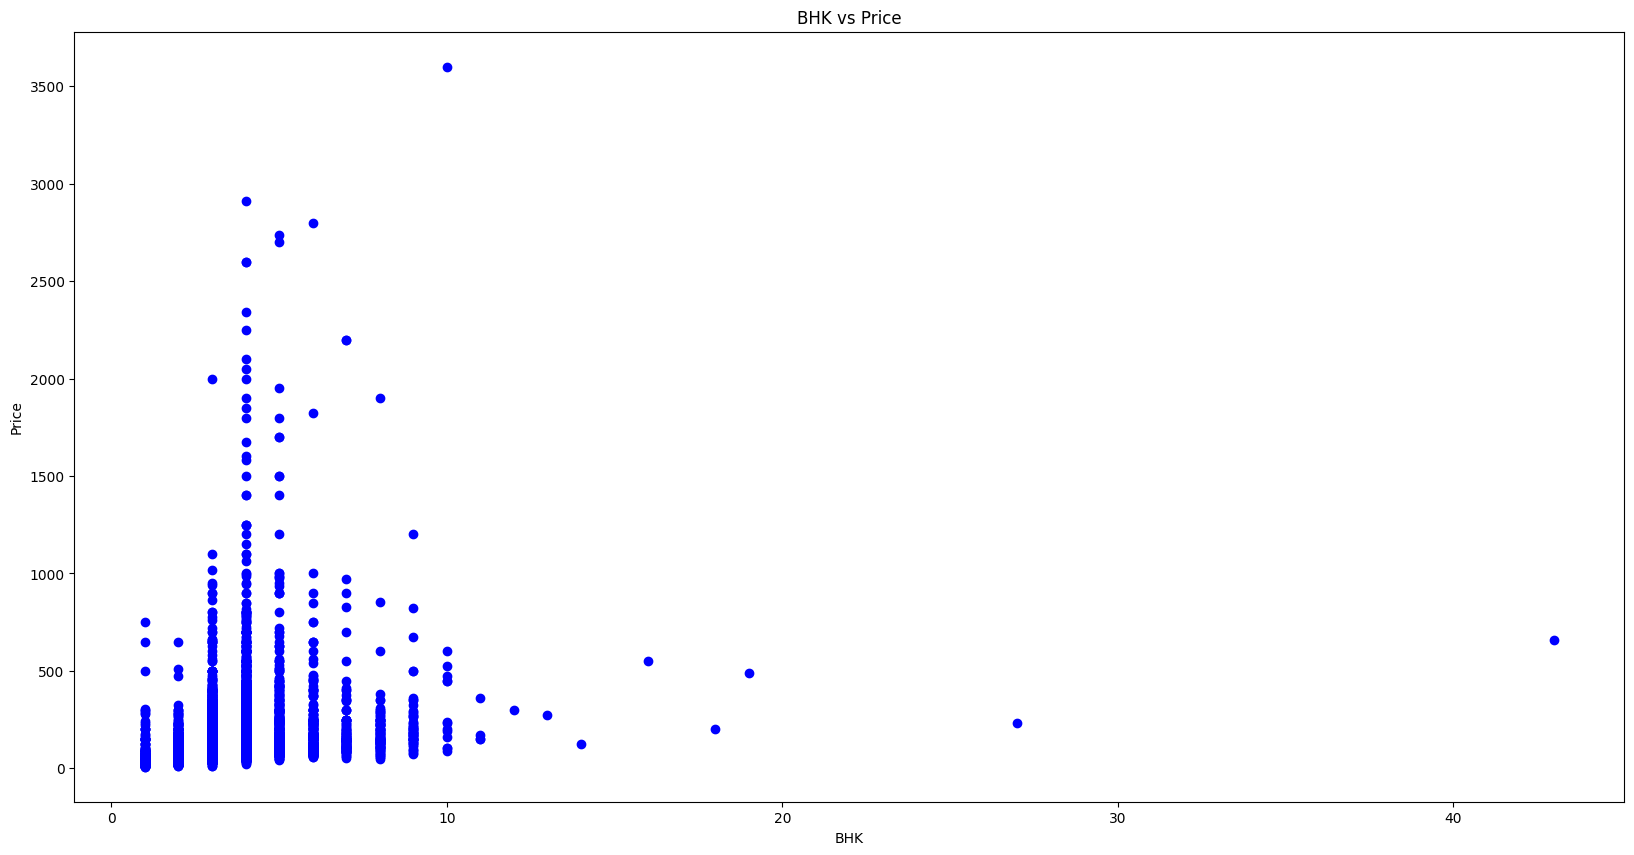

In [99]:
plt.plot(df3.bhk, df3.price, 'ro', color='blue')  # Plotting the relationship between 'bhk' and 'price'
plt.xlabel('BHK')
plt.ylabel('Price')
plt.title('BHK vs Price')
plt.show()

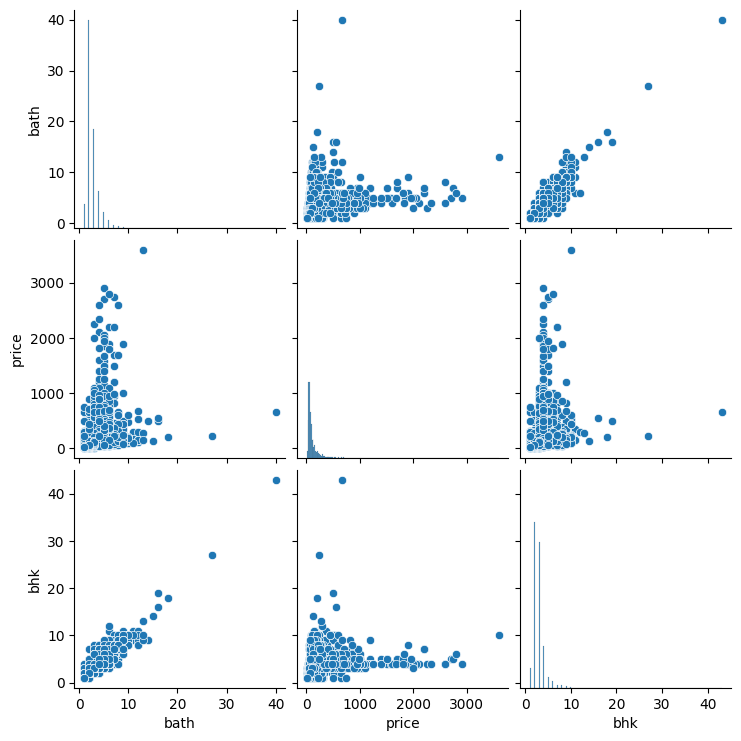

In [100]:
import seaborn as sns
sns.pairplot(df3)  # Pairplot to visualize relationships between variables

In [101]:
df3.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [102]:
df3.total_sqft.unique()  # Check unique values in the 'total_sqft' column

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [103]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [104]:
df3[~df3['total_sqft'].apply(is_float)].sample(10)

,location,size,total_sqft,bath,price,bhk
6682,Devanahalli,1 BHK,655 - 742,1.00,28.57,1
9183,Hormavu,2 BHK,943 - 1220,2.00,38.66,2
8023,Devanahalli,4 Bedroom,4900 - 4940,4.00,393.50,4
5887,Rajaji Nagar,4 BHK,2563 - 2733,5.00,251.50,4
9519,Bommenahalli,3 Bedroom,2940Sq. Yards,3.00,232.00,3
5643,Kengeri Satellite Town,2 BHK,1255 - 1350,2.00,44.28,2
8477,Hosa Road,1 BHK,615 - 985,1.00,39.99,1
1821,Sarjapur,3 Bedroom,1574Sq. Yards,3.00,76.00,3
4293,Bannerghatta Road,4 BHK,315Sq. Yards,5.00,260.00,4
5374,Varthur Road,2 BHK,770 - 841,2.00,19.33,2


In [105]:
unit_to_sqft = {
    'Sq. Yards': 9.0,
    'Sq. Yard': 9.0,
    'Sq. Yd': 9.0,
    'Sq. ft': 1.0,
    'Sq. Feet': 1.0,
    'Sq. Meter': 10.7639,
    'Sq. M': 10.7639,
    'Acres': 43560.0,
    'Acre': 43560.0,
    'Perch': 272.25,
    'Cent': 435.6,
    'Cents': 435.6,
    'Guntha': 1089.0,
    'Grounds': 2400.0,
    'Ground': 2400.0
}


In [106]:
import re

def parse_area(x):
    # Handle ranges like "2100 - 2850"
    if isinstance(x, str) and '-' in x:
        tokens = x.split('-')
        try:
            return (float(tokens[0].strip()) + float(tokens[1].strip())) / 2
        except:
            return x
    
    # Handle float/int directly
    if isinstance(x, (int, float)):
        return float(x)
    
    if not isinstance(x, str):
        return x

    # Handle unit conversion like "188.89Sq. Yards"
    match = re.match(r'([\d.,]+)\s*([A-Za-z. ]+)', x)
    if match:
        value, unit = match.groups()
        try:
            value = float(value.replace(',', '').strip())
            unit = unit.strip()
            for key in unit_to_sqft:
                if key.lower() in unit.lower():
                    return value * unit_to_sqft[key]
            return x  # Unknown unit
        except:
            return x

    # Handle plain floatable strings like "1200"
    try:
        return float(x)
    except:
        return x


In [107]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(parse_area)

In [108]:
df4.total_sqft.unique()  # Check unique values in the 'total_sqft' column after parsing                 

array([1056.0, 2600.0, 1440.0, ..., 1258.5, 774.0, 4689.0],
      shape=(2007,), dtype=object)

In [109]:
df4.total_sqft.sample(15)               

1363     510.00
272      883.00
2677    1400.00
3100    1640.00
4147    1200.00
4202     620.00
8315    1850.00
2403    1800.00
12282   1820.00
598     1249.00
2646    1615.00
5705    1200.00
13055   1310.00
5318    1179.00
9310    1464.00
Name: total_sqft, dtype: object

In [110]:
df4.isna().sum()  # Check for any missing values after parsing      

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [111]:
df4.describe(include='all')  # Get a statistical summary of the DataFrame after parsing                 

,location,size,total_sqft,bath,price,bhk
count,13246,13246,13246.00,13246.00,13246.00,13246.00
unique,1304,31,2007.00,NaN,NaN,NaN
top,Whitefield,2 BHK,1200.00,NaN,NaN,NaN
freq,534,5198,843.00,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.69,112.39,2.80
std,NaN,NaN,NaN,1.34,149.08,1.30
min,NaN,NaN,NaN,1.00,8.00,1.00
25%,NaN,NaN,NaN,2.00,50.00,2.00
50%,NaN,NaN,NaN,2.00,72.00,3.00
75%,NaN,NaN,NaN,3.00,120.00,3.00


In [112]:
df4[~df4['total_sqft'].apply(is_float)] # Check for any non-float values in 'total_sqft'

,location,size,total_sqft,bath,price,bhk


In [113]:
print(df4['total_sqft'].dtype)

object


In [114]:
df4['total_sqft'] = pd.to_numeric(df4['total_sqft'], errors='coerce') # Convert 'total_sqft' to numeric, coercing errors to NaN

In [115]:
print(df4['total_sqft'].dtype)

float64


In [116]:
df4.describe()  # Get a statistical summary of the DataFrame after parsing

,total_sqft,bath,price,bhk
count,13246.00,13246.00,13246.00,13246.00
mean,1909.25,2.69,112.39,2.80
std,17324.84,1.34,149.08,1.30
min,1.00,1.00,8.00,1.00
25%,1100.00,2.00,50.00,2.00
50%,1275.00,2.00,72.00,3.00
75%,1678.75,3.00,120.00,3.00
max,1306800.00,40.00,3600.00,43.00


In [117]:
pd.set_option('display.float_format', '{:.2f}'.format) # Set display format for floats


In [118]:
df4.describe()  

,total_sqft,bath,price,bhk
count,13246.00,13246.00,13246.00,13246.00
mean,1909.25,2.69,112.39,2.80
std,17324.84,1.34,149.08,1.30
min,1.00,1.00,8.00,1.00
25%,1100.00,2.00,50.00,2.00
50%,1275.00,2.00,72.00,3.00
75%,1678.75,3.00,120.00,3.00
max,1306800.00,40.00,3600.00,43.00


<div style="font-size:2em; font-weight:bold; color:#2c3e50; margin-bottom:10px;">Feature Engineering</div>

In [119]:
df5 = df4.copy()  # Create a copy of the DataFrame for further processing

In [120]:
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']  # Calculate price per square foot

In [121]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13246.00,13246.00,13246.00,13246.00,13246.00
mean,1909.25,2.69,112.39,2.80,7915.28
std,17324.84,1.34,149.08,1.30,106545.23
min,1.00,1.00,8.00,1.00,2.26
25%,1100.00,2.00,50.00,2.00,4262.30
50%,1275.00,2.00,72.00,3.00,5433.10
75%,1678.75,3.00,120.00,3.00,7317.07
max,1306800.00,40.00,3600.00,43.00,12000000.00


In [122]:
df5[df5['total_sqft'] == df5['total_sqft'].max()]  # Check for the maximum 'total_sqft' value

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1086,Narasapura,2 Bedroom,1306800.00,2.00,29.50,2,2.26


In [123]:
len(df5.location.unique())

1304

In [124]:
df5.location = df5.location.apply(lambda x: x.strip())  # Normalize location names

In [125]:
location_stats = df5.groupby('location')['location'].count().sort_values(ascending=False)  # Count of properties per location
location_stats

location
Whitefield              535
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          266
Thanisandra             236
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
Kamdhenu Nagar            1
Kanakadasa Layout         1
K N Extension             1
Name: location, Length: 1293, dtype: int64

In [126]:
len(location_stats)

1293

In [127]:
len(location_stats[location_stats <= 10])  # Count locations with less than 10 properties

1052

In [128]:
location_stats_under_10 = location_stats[location_stats <= 10]  # Get locations with less than or equal to 10 properties
location_stats_under_10

location
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Naganathapura           10
Nagadevanahalli         10
Sector 1 HSR Layout     10
                        ..
Kalhalli                 1
Kalkere Channasandra     1
Kamdhenu Nagar           1
Kanakadasa Layout        1
K N Extension            1
Name: location, Length: 1052, dtype: int64

In [129]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_under_10 else x)  

In [130]:
len(df5.location.unique())  # Check the number of unique locations

242

<div style="font-size:2em; font-weight:bold; color:#2c3e50; margin-bottom:10px;">Outliers</div>

In [131]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.00,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.00,2.00,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.00,3.00,95.00,3,6245.89
4,Kothanur,2 BHK,1200.00,2.00,51.00,2,4250.00


In [132]:
df5[df5['total_sqft'] / df5['bhk'] < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.00,6.00,370.00,6,36274.51
45,HSR Layout,8 Bedroom,600.00,9.00,200.00,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.00,4.00,150.00,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.00,7.00,85.00,8,6296.30
70,other,3 Bedroom,500.00,3.00,100.00,3,20000.00
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.00,7.00,218.00,7,15571.43
13279,other,6 Bedroom,1200.00,5.00,130.00,6,10833.33
13281,Margondanahalli,5 Bedroom,1375.00,5.00,125.00,5,9090.91
13303,Vidyaranyapura,5 Bedroom,774.00,5.00,70.00,5,9043.93


In [133]:
df5.shape

(13246, 7)

In [134]:
df6 = df5[~(df5['total_sqft'] / df5['bhk'] < 300)]  # Remove outliers based on sqft per BHK

In [135]:
df6.shape

(12498, 7)

In [136]:
df5.shape[0] - df6.shape[0]  # Calculate the number of rows removed

748

In [137]:
df6.price_per_sqft.describe()  # Get a statistical summary of the 'price_per_sqft' column

count    12498.00
mean      6298.90
std       4169.13
min          2.26
25%       4203.46
50%       5291.01
75%       6916.67
max     176470.59
Name: price_per_sqft, dtype: float64

In [138]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [ ]:
df7 = remove_outliers(df6)  # Remove outliers using the defined function

In [140]:
df7.shape , df6.shape[0] - df7.shape[0]  # Check the shape of the DataFrame after removing outliers and the number of rows removed

((10268, 7), 2230)

In [141]:
df7.price_per_sqft.describe()  # Get a statistical summary of the 'price_per_sqft' column after removing outliers

count   10268.00
mean     5657.87
std      2267.53
min        33.21
25%      4242.42
50%      5174.22
75%      6428.57
max     24509.80
Name: price_per_sqft, dtype: float64

In [ ]:
df7[df7['price_per_sqft'] == df7.price_per_sqft.min()] 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1371,Bommenahalli,3 Bedroom,653400.00,3.00,217.00,3,33.21


In [156]:
df7[df7['price_per_sqft'] == df7.price_per_sqft.max()] 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2531,HAL 2nd Stage,5 Bedroom,2040.00,4.00,500.00,5,24509.80


In [157]:
df7.groupby('location')['location'].count().sort_values(ascending=False)  # Count of properties per location after outlier removal

location
other                   2308
Whitefield               481
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           190
                        ... 
Banjara Layout             4
HAL 2nd Stage              4
Vishwapriya Layout         4
Vishveshwarya Layout       4
Marsur                     3
Name: location, Length: 242, dtype: int64

In [150]:
def plot_scatter_chart(df , location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)  # Set figure size for better visibility
    plt.scatter(bhk2['total_sqft'], bhk2['price_per_sqft'], color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price_per_sqft'], marker='x', color='red', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet')
    plt.ylabel('Price per Square Foot')
    plt.title(f'Price per Square Foot vs Total Square Feet for {location}')
    plt.legend()

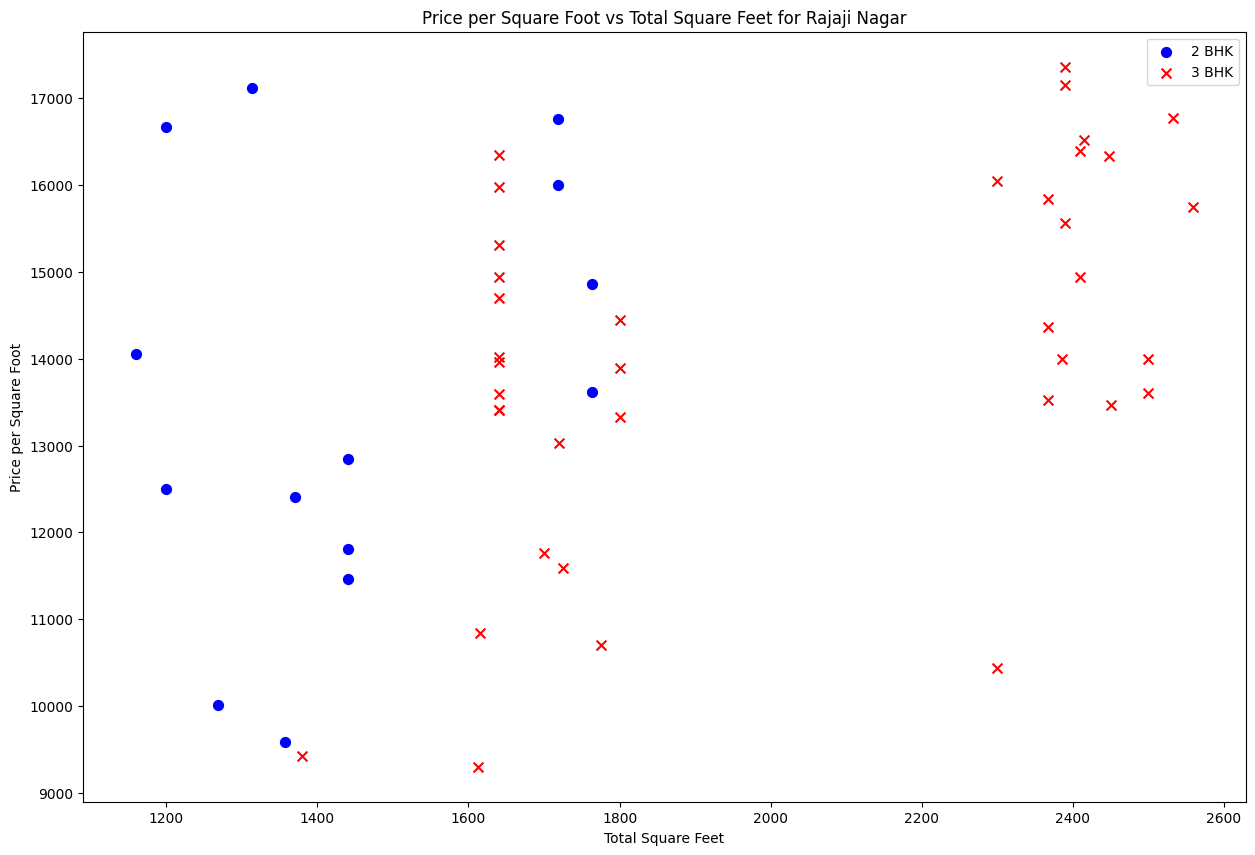

In [161]:
plot_scatter_chart(df7, 'Rajaji Nagar')  # Example usage of the scatter plot function for a specific location

In [159]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)

    return df.drop(exclude_indices, axis='index')

In [160]:
df8 = remove_bhk_outliers(df7)  # Remove BHK outliers using the defined function

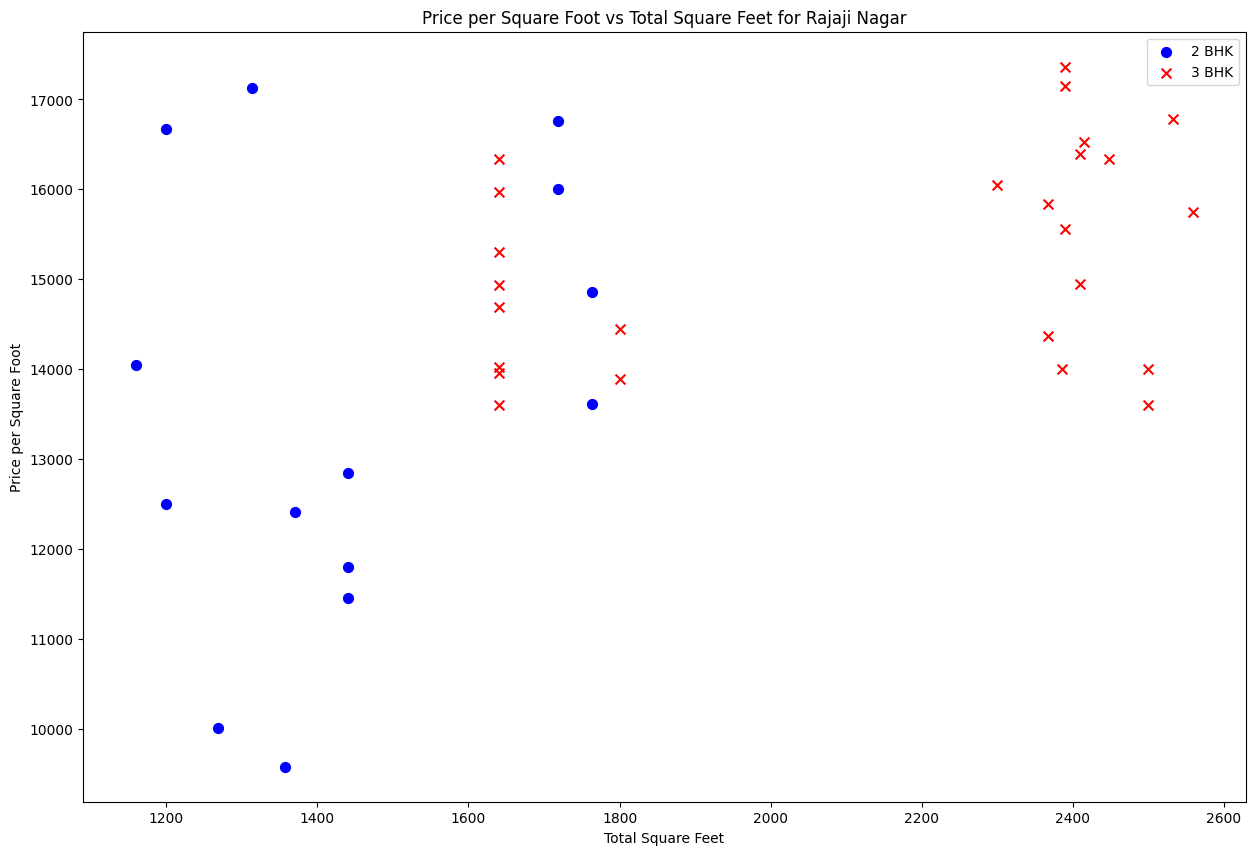

In [162]:
plot_scatter_chart(df8, 'Rajaji Nagar')  # Example usage of the scatter plot function for a specific location

In [163]:
df8.shape , df7.shape[0] - df8.shape[0]  # Check the shape of the DataFrame after removing BHK outliers and the number of rows removed

((7344, 7), 2924)

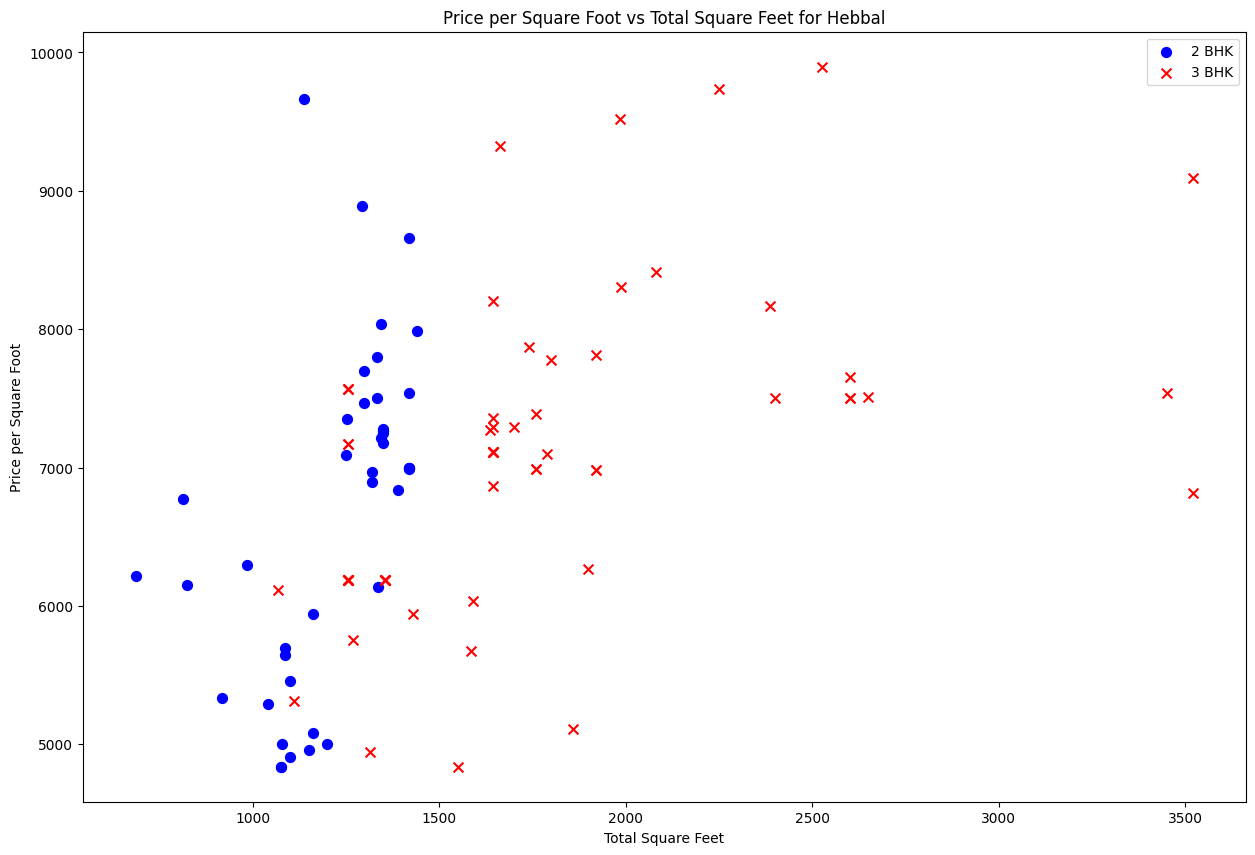

In [164]:
plot_scatter_chart(df7, 'Hebbal')  # Example usage of the scatter plot function for a specific location

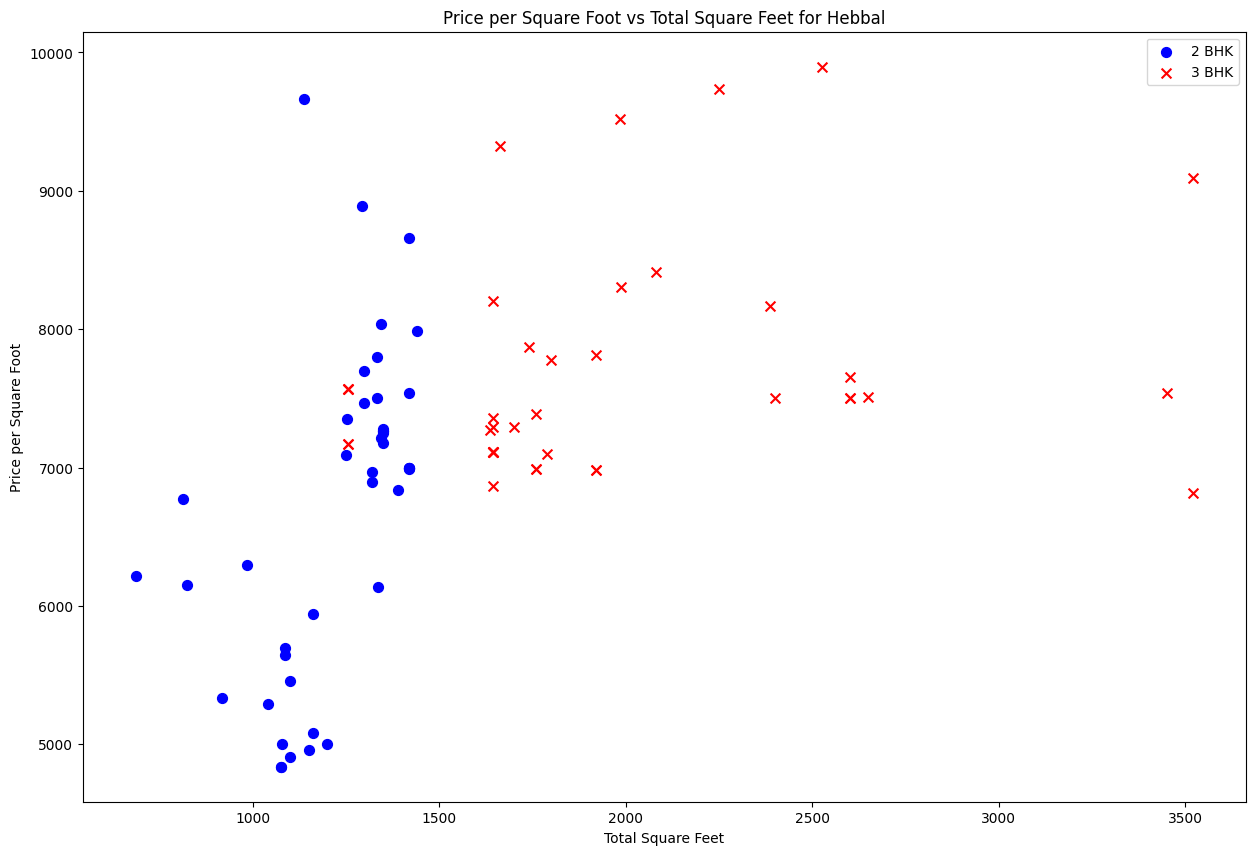

In [165]:
plot_scatter_chart(df8 , "Hebbal")  # Example usage of the scatter plot function for a specific location

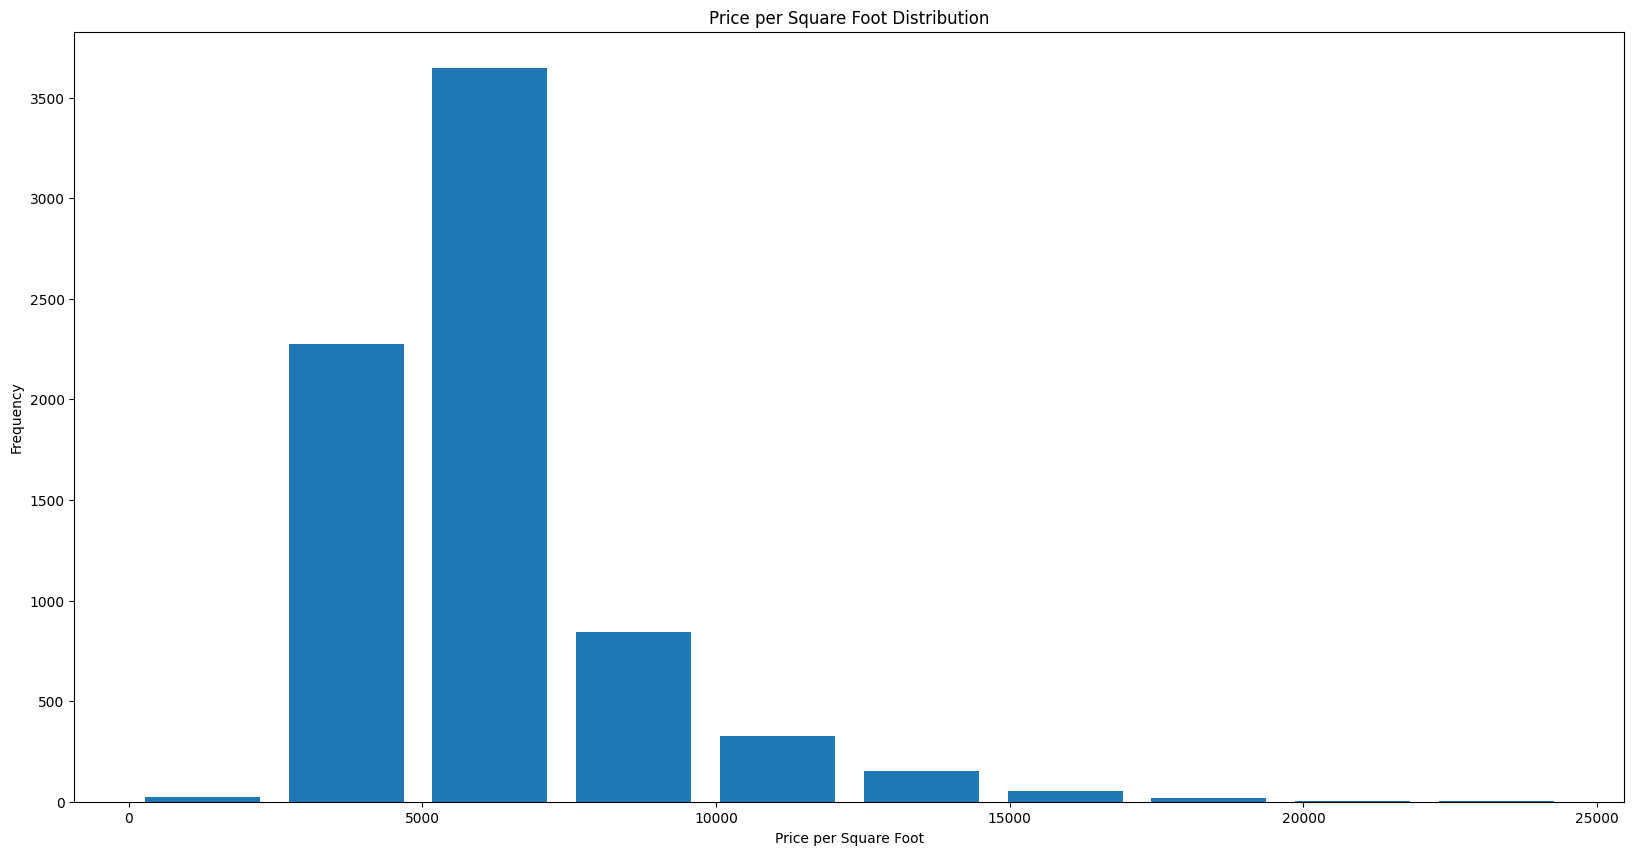

In [ ]:
plt.hist(df8['price_per_sqft'], rwidth=0.8)  # Histogram of price per square foot after outlier removal
matplotlib.rcParams['figure.figsize'] = (20, 10)  # Set figure size for better visibility
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.title('Price per Square Foot Distribution')
plt.show()

In [172]:
df8.groupby('bath')['bath'].count().sort_values(ascending=False)  # Count of properties per location after BHK outlier removal

bath
2.00     4200
3.00     1770
1.00      571
4.00      507
5.00      173
6.00       82
7.00       16
8.00       13
9.00        7
12.00       3
13.00       1
16.00       1
Name: bath, dtype: int64

In [173]:
df8[df8['bath'] > 10]  # Check for any outliers in the 'bath' column

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5291,Neeladri Nagar,10 BHK,4000.00,12.00,160.00,10,4000.00
8507,other,10 BHK,12000.00,12.00,525.00,10,4375.00
8596,other,16 BHK,10000.00,16.00,550.00,16,5500.00
9332,other,11 BHK,6000.00,12.00,150.00,11,2500.00
9664,other,13 BHK,5425.00,13.00,275.00,13,5069.12


In [174]:
df8[df8['bath']>df8['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1632,Chikkabanavar,4 Bedroom,2460.00,7.00,80.00,4,3252.03
5252,Nagasandra,4 Bedroom,7000.00,8.00,450.00,4,6428.57
6727,Thanisandra,3 BHK,1806.00,6.00,116.00,3,6423.03
8431,other,6 BHK,11338.00,9.00,1000.00,6,8819.90


In [175]:
df9 = df8[df8['bath']<df8['bhk']+2]

In [176]:
df9.shape , df8.shape[0] - df9.shape[0]  # Check the shape of the DataFrame after removing bath outliers and the number of rows removed

((7266, 7), 78)

In [177]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')  # Drop unnecessary columns

<div style="font-size:2em; font-weight:bold; color:#16a085; margin-bottom:10px;">One Hot Encoding</div>

In [180]:
dummies = pd.get_dummies(df10.location)
df10 = pd.concat([df10, dummies], axis=1)

In [181]:
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.00,4.00,428.00,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.00,3.00,194.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.00,2.00,235.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.00,2.00,130.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.00,2.00,148.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [182]:
df10 = df10.drop('location', axis='columns')  # Drop the 'location' column after one-hot encoding

<span style="font-size:2em; font-weight:bold; color:#16a085; margin-bottom:10px;">Build model</span>

In [222]:
data = df10.copy()  # Create a copy of the DataFrame for further processing

In [257]:
X = data.drop('price', axis='columns')  # Features
y = data['price']  # Target variable

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Split the data into training and testing sets

test a linear model

In [228]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Create a Linear Regression model
model.fit(X_train, y_train)  # Train the model on the training data
model.score(X_test, y_test)  # Evaluate the model on the test data

0.6734617473520178

use cross validation

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score 
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)  # Create a ShuffleSplit cross-validator
cross_val_score(LinearRegression(), X, y, cv=cv)  # Perform cross-validation on the model


array([0.63989067, 0.62381148, 0.62305156, 0.60649799, 0.66420308])

choose the best model 

In [ ]:
from sklearn.model_selection import ShuffleSplit , RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

def find_best_model(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {} 
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1, 2],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50],
                'max_features': ['sqrt', 'log2'],  # removed 'auto'
                'max_depth': [None, 10],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2],
                'bootstrap': [True, False]
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2],
                'subsample': [0.8, 1.0]
            }
        },
        'xgboost': {
            'model': XGBRegressor(verbosity=0),
            'params': {
                'n_estimators': [100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5],
                'min_child_weight': [1, 2],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'gamma': [0, 0.1]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        print(f"Training: {algo_name}")
        gs = RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        try :
            gs.fit(X,y)
        except Exception as e:
            print(f"Error training {algo_name}: {e}")
            continue
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params']).sort_values(by='best_score', ascending=False)

In [248]:
best_model_df = find_best_model(X, y)  # Find the best model based on cross-validation scores

Training: linear_regression


/home/abdeslem/Folders/all start/Web-Project/Home_Price/.env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training: lasso


/home/abdeslem/Folders/all start/Web-Project/Home_Price/.env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training: ridge
Training: random_forest
Training: gradient_boosting
Training: xgboost
Training: decision_tree


/home/abdeslem/Folders/all start/Web-Project/Home_Price/.env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [251]:
pd.set_option('display.max_colwidth', None)
best_model_df

,model,best_score,best_params
3,random_forest,0.87,"{'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}"
4,gradient_boosting,0.86,"{'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}"
5,xgboost,0.84,"{'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}"
6,decision_tree,0.79,"{'splitter': 'best', 'criterion': 'friedman_mse'}"
2,ridge,0.64,"{'solver': 'svd', 'alpha': 2}"
0,linear_regression,0.63,{}
1,lasso,0.44,"{'selection': 'cyclic', 'alpha': 1}"


In [252]:
best_model = RandomForestRegressor(
    n_estimators=10,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    bootstrap=False
)
best_model.fit(X_train, y_train)  # Train the best model on the training data
best_model.score(X_test, y_test)  # Evaluate the best model on the test data

0.8384506448828086

make some prediction with the best model

In [265]:
def predict_price(location, sqft, bhk, bath):
    loc_index = np.where(X.columns == location)[0][0]  # Get the index of the location column
    x = np.zeros(len(X.columns))
    x[0] = sqft  # Set the square footage
    x[1] = bath  # Set the number of bedrooms
    x[2] = bhk  # Set the number of bathrooms
    if loc_index >= 0:
        x[loc_index] = 1  # Set the location index to 1
    return best_model.predict([x])[0]  # Predict the price using the trained model
        

In [262]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/home/abdeslem/Folders/all start/Web-Project/Home_Price/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(89.09283333333335)

In [263]:

predict_price('Indira Nagar',1000, 3, 3)

/home/abdeslem/Folders/all start/Web-Project/Home_Price/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(152.363)

train the model with the full data to maximize the learning before using it for real predictions

In [264]:
best_model.fit(X, y)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [ ]:
predict_price('Indira Nagar',1000, 3, 3)

/home/abdeslem/Folders/all start/Web-Project/Home_Price/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(117.48833333333334)

<div style="background:#f9f9f9; border-radius:8px; box-shadow:0 2px 8px rgba(44,62,80,0.08); padding:24px; margin:24px 0;">
        Export the Model in a Pickle File
</div>

In [269]:
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(best_model, f)  # Save the trained model to a file

<div style="background:#f4f8fb; border-radius:8px; box-shadow:0 2px 8px rgba(44,62,80,0.08); padding:24px; margin:24px 0;">
    <span style="font-size:1.5em; font-weight:bold; color:#2c3e50;">Export Data Columns</span>
</div>

In [268]:
import json 
column = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(column))  # Save the column names to a JSON file